# Revision for exams

## Solutions of previous years assignments 2022-2023

### Unit 1

**Problem 7**

Using Sagemath find the reduced row echelon form and the rank of the matrices
(a) The 3 by 4 matrix with all entries equal to 4.
(b) The 3 by 4 matrix A with entries Aij = i + j − 1.
(c) The 3 by 4 matrix A with entries Aij = (−1)j

(a)

In [17]:
%display latex

A = matrix(QQ, [[4,4,4,4], [4,4,4,4], [4,4,4,4]]); A

[4 4 4 4]
[4 4 4 4]
[4 4 4 4]

In [18]:
A.rref()

[1 1 1 1]
[0 0 0 0]
[0 0 0 0]

In [19]:
rank(A)

1

(b)

In [20]:
A = matrix(QQ, 3, 4, lambda i, j: ((i + 1) + (j + 1) - 1)); A

[1 2 3 4]
[2 3 4 5]
[3 4 5 6]

In [21]:
A.rref()

[ 1  0 -1 -2]
[ 0  1  2  3]
[ 0  0  0  0]

In [22]:
rank(A)

2

(c)

In [23]:
A = matrix(QQ, 3, 4, lambda i, j: (-1)^(j+1)); A

[-1  1 -1  1]
[-1  1 -1  1]
[-1  1 -1  1]

In [24]:
A.rref()

[ 1 -1  1 -1]
[ 0  0  0  0]
[ 0  0  0  0]

In [25]:
rank(A)

1

**Problem 8**

Solve the following system using Sagemath\
    p + 2q + 3r + s = 1\
    2p + q + 8r + 2s = 2\
    p + 6q − 3r + 5s = −2\
    2p − q + r − s = λ\
in the case λ = 0\
(a) directly solving the system;\
(b) utilising the inverse of a matrix;\
(c) using Gauss elimination;\
and (d) for general λ, using one of methods mentioned above.

In [26]:
p, q, r, s, λ = var('p, q, r, s, λ')

(a)

In [27]:
eqs0 = [p+2*q+3*r+s == 1, 
        2*p+q+8*r+2*s == 2,
        p+6*q-3*r+5*s == -2,
        2*p-q+r-s == 0]

solve(eqs0, [p, q, r, s])

[[p == (-18/65), q == (17/65), r == (51/130), s == (-11/26)]]

(b)

In [28]:
A = matrix(QQ,[[1, 2, 3, 1], [2, 1, 8, 2], [1, 6, -3, 5], [2, -1, 1, -1]])
Y = matrix(QQ, 4, 1, [1, 2, -2, 0])

A, Y

(
[ 1  2  3  1]  [ 1]
[ 2  1  8  2]  [ 2]
[ 1  6 -3  5]  [-2]
[ 2 -1  1 -1], [ 0]
)

In [29]:
A^(-1)*Y

[-18/65]
[ 17/65]
[51/130]
[-11/26]

(c)

In [30]:
AA = A.augment(Y, subdivide = true); AA

[ 1  2  3  1| 1]
[ 2  1  8  2| 2]
[ 1  6 -3  5|-2]
[ 2 -1  1 -1| 0]

In [31]:
AA.echelon_form()

[     1      0      0      0|-18/65]
[     0      1      0      0| 17/65]
[     0      0      1      0|51/130]
[     0      0      0      1|-11/26]

(d)

In [32]:
eqs = [p+2*q+3*r+s == 1,
       2*p+q+8*r+2*s == 2,
       p+6*q-3*r+5*s == -2,
       2*p-q+r-s == λ]

solve(eqs, [p,q,r,s])

[[p == 31/65*λ - 18/65, q == -4/65*λ + 17/65, r == -6/65*λ + 51/130, s == -1/13*λ - 11/26]]

### Unit 2

**Problem 7**

Solution:

(a)

In [33]:
%display latex

m = matrix(QQ, [[1,1,2], [1,-1,0], [1,0,4]])
g, s = m.gram_schmidt();
A, B, C = g; A, B, C

((1, 1, 2), (1, -1, 0), (-1, -1, 1))

(b)

In [34]:
aa = A/norm(A); bb = B/norm(B); cc = C/norm(C);
aa, bb, cc

((1/6*sqrt(6), 1/6*sqrt(6), 1/3*sqrt(6)),
 (1/2*sqrt(2), -1/2*sqrt(2), 0),
 (-1/3*sqrt(3), -1/3*sqrt(3), 1/3*sqrt(3)))

(c)

In [35]:
d = vector(QQ, [1,1,1])
(d.dot_product(aa), d.dot_product(bb), d.dot_product(cc))

(2/3*sqrt(6), 0, -1/3*sqrt(3))

**Problem 8**

Using Sagemath\
(a) define a function that rotates a two dimensional vector by an angle θ given in degrees;\
(b) use this function to successively rotate the vector ⃗a = (1, 1) by 30◦ and then by 45◦ and define vectors\
⃗a1 and ⃗a2 respectively;\
(c) plot the vectors ⃗a, ⃗a1, ⃗a2 using different colors;\
(d) compute the angle (in degrees) between ⃗a and ⃗a2

(a)

In [36]:
th = var('th')
ppi = n(pi)/180.
rot(th) = matrix(SR, [[cos(th*ppi), -sin(th*ppi)], [sin(th*ppi), cos(th*ppi)]])
a = vector(RR, [1., 1.])

a1 = rot(30)*a
a2 = rot(45)*a1

a1, a2

((0.366025403784439, 1.36602540378444), (-0.707106781186547, 1.22474487139159))

(c)

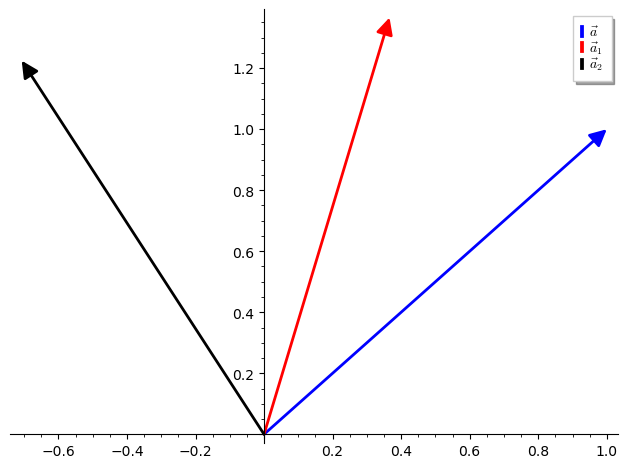

In [37]:
arrow2d((0, 0), a, legend_label = '$\\vec{a}$', legend_color = 'black') + \
    arrow2d((0, 0), a1, legend_label = '$\\vec{a}_1$', legend_color = 'black', color = 'red') + \
        arrow2d((0, 0), a2, legend_label = '$\\vec{a}_2$', legend_color = 'black', color = 'black')

In [38]:
arccos(a.dot_product(a2)/norm(a)/norm(a2))/ppi

75.0000000000000

### Unit 3

**Problem 7**

Using Sagemath
(a) (i) create a random 5 × 5 symmetric positive definite matrix A, (ii) set A11 = p, A22 = q where p, q
the last two digits of your ID number∗ (your e-mail is of the form std????pq@ac.eap.gr) , (iii) check if
the resulting matrix is positive definite and if not repeat steps (i)-(iii) until you get a symmetric positive
definite matrix A;
(b) compute the Cholesky decomposition of A and find a matrix C such as A = CC T ;
(c) compute the singular value decomposition of C, C = U ΣV T ;
(d) define X = U ΣU T and check the relation A = X 2 .
∗
In case some of these digits equals zero, please replace it with the digit 1.

(a)

In [39]:
m = random_matrix(RDF, 5); m

[ 0.09124567590651189  -0.8993051350616927  0.12213795355421508   -0.572496050688541 -0.09121386605725412]
[  0.9945838794718254  0.47238775658339116  -0.2840024901626792  -0.5459930922625225  -0.4999778103846544]
[-0.13879160347716013   0.4291698572437179 -0.14755697929796163   0.7962518713092261 -0.02232827406630533]
[ -0.2944181845378897  -0.4054736445017264   0.0831717584295022  -0.6057303651916319   0.7935591331032597]
[  -0.773521101076774   0.4462625319154734  -0.4563761786092022 -0.45899634819641366   0.5086338212731956]

In [40]:
A = transpose(m) * m; A.n(digits = 4)

[   1.702   0.1024  0.07769  -0.1724   -1.130]
[  0.1024    1.580  -0.5447   0.6394  -0.2585]
[ 0.07769  -0.5447   0.3325   0.1267 -0.03198]
[ -0.1724   0.6394   0.1267    1.837  -0.4067]
[  -1.130  -0.2585 -0.03198  -0.4067    1.147]

In [41]:
A[0,0] = 1; A[1,1] = 2; A.n(digits = 4)

[   1.000   0.1024  0.07769  -0.1724   -1.130]
[  0.1024    2.000  -0.5447   0.6394  -0.2585]
[ 0.07769  -0.5447   0.3325   0.1267 -0.03198]
[ -0.1724   0.6394   0.1267    1.837  -0.4067]
[  -1.130  -0.2585 -0.03198  -0.4067    1.147]

In [42]:
A.is_positive_definite()

False

(b)

In [43]:
C = A.cholesky(); C.n(digits = 4)

ValueError: matrix is not positive definite

(c)

In [ ]:
U, Σ, V = C.SVD()
U.n(digits = 4)

[ -0.1092  -0.3618   0.5009  -0.5567   0.5443]
[  0.7065  -0.4949  -0.2625   0.2739   0.3346]
[ -0.1682  0.07219   0.5583   0.7600   0.2777]
[ 0.03000   0.6477  -0.3330 -0.05952   0.6820]
[  0.6780   0.4467   0.5075  -0.1840  -0.2223]

In [ ]:
Σ.n(digits = 4)

[ 1.618 0.0000 0.0000 0.0000 0.0000]
[0.0000  1.434 0.0000 0.0000 0.0000]
[0.0000 0.0000  1.336 0.0000 0.0000]
[0.0000 0.0000 0.0000 0.8199 0.0000]
[0.0000 0.0000 0.0000 0.0000 0.3822]

In [ ]:
V.n(digits = 4)

[-0.1767 -0.5189  0.6692 -0.4565  0.2081]
[ 0.7943 -0.5577 -0.1806  0.1128  0.1122]
[0.02983 0.04415  0.5671  0.8157  0.1009]
[ 0.3447  0.5453  0.1368 -0.2259  0.7170]
[ 0.4670  0.3470  0.4233 -0.2500 -0.6480]

(d)

In [ ]:
X = U * Σ * transpose(U); X

[   0.909652699754898  -0.0991666661222271  0.07675225010882122 -0.39514839402952856 0.025783268953815407]
[-0.09916666612222716   1.3551920947280844  -0.2330647533448842  -0.2347943310519652  0.21017326559497665]
[ 0.07675225010882122  -0.2330647533448842   0.9727936937837006 -0.15415333699043643  0.10206072828449171]
[ -0.3951483940295284  -0.2347943310519652 -0.15415333699043643    0.931970220356766    0.173113261305525]
[ 0.02578326895381542  0.21017326559497665  0.10206072828449182  0.17311326130552507    1.420512438006405]

In [ ]:
(A - X^2).n(digits = 4)

[ 7.772e-16 -1.610e-15  1.332e-15  7.772e-16  2.047e-15]
[-1.416e-15  1.110e-15 -8.327e-16  2.220e-16 -1.443e-15]
[ 1.305e-15 -8.327e-16  1.776e-15 -8.882e-16  1.693e-15]
[ 3.331e-16  2.776e-16 -8.882e-16 -8.882e-16 -1.776e-15]
[ 2.012e-15 -1.443e-15  1.416e-15 -1.887e-15     0.0000]

We have $A=X^2$ modulo rounding errors.

This is to be expected as
$A=CC^T=UΣV^T(UΣV^T)^T=UΣV^TVΣU^T=UΣ^2U^T=UΣ(U^TU)ΣU^T=(UΣU^T)(UΣU^T)=X^2$, where we have used $VV^T=UU^T=1$.

**Problem 8**

Using Sagemath
(a) compute the SVD of the 5 × 5 matrix A with elements Aij = (i j)/(i + 2j + 2);
(b) compute the rank 2 approximation A2 of the matrix A;
(c) compute the SVD of A2 and comment on any discrepancies between the singular value matrices in
cases (a) and (b).

(a)

In [ ]:
A = matrix(QQ, 5, 5, lambda ii, jj: (ii+1)*(jj+1)/(ii+2*jj+5)); A

[  1/5   2/7   1/3  4/11  5/13]
[  1/3   1/2   3/5   2/3   5/7]
[  3/7   2/3  9/11 12/13     1]
[  1/2   4/5     1   8/7   5/4]
[  5/9 10/11 15/13   4/3 25/17]

In [ ]:
AA = A.change_ring(RDF); AA

[                0.2  0.2857142857142857  0.3333333333333333 0.36363636363636365 0.38461538461538464]
[ 0.3333333333333333                 0.5                 0.6  0.6666666666666666  0.7142857142857143]
[0.42857142857142855  0.6666666666666666  0.8181818181818182  0.9230769230769231                 1.0]
[                0.5                 0.8                 1.0  1.1428571428571428                1.25]
[ 0.5555555555555556  0.9090909090909091  1.1538461538461537  1.3333333333333333  1.4705882352941178]

In [ ]:
U, Σ, V = AA.SVD()
U.n(digits = 4)

[ -0.1759  -0.5473   0.6814  -0.4306  -0.1406]
[ -0.3185  -0.5503 -0.03729   0.6215   0.4562]
[ -0.4369  -0.2891  -0.4868 0.003925  -0.6990]
[ -0.5371   0.1013  -0.3185  -0.5807   0.5124]
[ -0.6231   0.5512   0.4426   0.3017  -0.1450]

In [ ]:
Σ.n(digits = 4)

[     4.062     0.0000     0.0000     0.0000     0.0000]
[    0.0000    0.08838     0.0000     0.0000     0.0000]
[    0.0000     0.0000   0.002855     0.0000     0.0000]
[    0.0000     0.0000     0.0000 0.00006152     0.0000]
[    0.0000     0.0000     0.0000     0.0000   5.600e-7]

In [ ]:
V.n(digits = 4)

[ -0.2323  -0.6778   0.6434  -0.2648 -0.05085]
[ -0.3686  -0.4764  -0.3398   0.6618   0.2896]
[ -0.4588  -0.1338  -0.4879  -0.3137  -0.6597]
[ -0.5230   0.2035  -0.1266  -0.4948   0.6513]
[ -0.5712   0.5042   0.4654   0.3857  -0.2327]

(b)

In [ ]:
u1, u2 = U.column(0), U.column(1)
v1, v2 = V.column(0), V.column(1)
s1, s2 = Σ[0,0], Σ[1,1]
A2 = s1*(u1.outer_product(v1)) + s2*(u2.outer_product(v2)); A2.n(digits = 4)

[0.1987 0.2864 0.3343 0.3639 0.3837]
[0.3334 0.4999 0.6000 0.6667 0.7143]
[0.4295 0.6662 0.8175 0.9229  1.001]
[0.5006 0.7997 0.9995  1.143  1.250]
[0.5547 0.9095  1.154  1.333  1.470]

In [ ]:
U2, Σ2, V2 = A2.SVD()
U2.n(digits = 4)

[-0.1759 -0.5473  0.7656  0.1153 -0.2649]
[-0.3185 -0.5503 -0.4630  0.5624  0.2551]
[-0.4369 -0.2891 -0.3649 -0.6305 -0.4414]
[-0.5371  0.1013  0.2505 -0.3291  0.7282]
[-0.6231  0.5512 0.06045  0.4057 -0.3737]

In [ ]:
Σ2.n(digits = 4)

[    4.062    0.0000    0.0000    0.0000    0.0000]
[   0.0000   0.08838    0.0000    0.0000    0.0000]
[   0.0000    0.0000 2.993e-16    0.0000    0.0000]
[   0.0000    0.0000    0.0000 8.001e-17    0.0000]
[   0.0000    0.0000    0.0000    0.0000 3.802e-17]

In [ ]:
V2.n(digits = 4)

[ -0.2323  -0.6778  -0.2587 -0.05621   0.6454]
[ -0.3686  -0.4764   0.4480   0.5195  -0.4082]
[ -0.4588  -0.1338   0.1141  -0.8060  -0.3301]
[ -0.5230   0.2035  -0.7445   0.2610  -0.2503]
[ -0.5712   0.5042   0.4062  0.09605   0.4953]

(c) Both Σ and Σ_2 matrices are diagonal. As far as the diagonal elements are concerned:


In [ ]:
D = vector(RDF, [Σ[0,0] - Σ2[0,0], Σ[1,1]-Σ2[1,1], Σ[2,2]-Σ2[2,2], Σ[3,3]-Σ2[3,3], Σ[4,4]-Σ2[4,4]])
D.n(digits = 4)

(0.0000, 2.776e-17, 0.002855, 0.00006152, 5.600e-7)

That is, therer are small discrepancies due to round off errors for the forst two elements and relatively large differences in the other two, as they were not\
included in the rank-2 approximation.


### Unit 4

**Problem 7**

Using Sagemath
(a) create a function called dplot(f,x0) that takes as input a symbolic mathematical function f(x), plots
$f(x), f′(x), f′′(x), f′′′(x)$ for $−x_0 < x < x_0$ and returns a combined graphics $2×2$ array displaying these
four plots with appropriate labels on each plot;
(b) use the function defined in (a) for $f(x) = sin(x^2)/x$ 
and $x_0=π$.

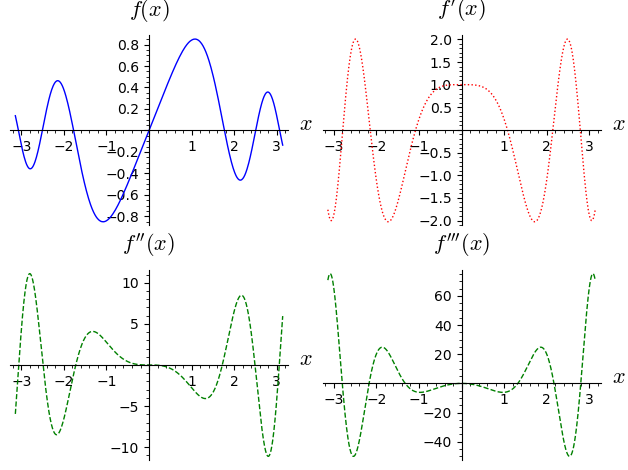

In [ ]:
def dplot(f, x0):
    d1f(x) = derivative(f, x, 1)
    d2f(x) = derivative(f, x, 2)
    d3f(x) = derivative(f, x, 3)

    p0 = plot(f, (x, -x0, x0), linestyle = '-', color = 'blue', axes_labels = ['$x$', '$f(x)$'])
    p1 = plot(d1f(x), (x, -x0, x0), linestyle = ':', color = 'red', axes_labels = ['$x$', '$f\'(x)$'])
    p2 = plot(d2f(x), (x, -x0, x0), linestyle = '--', color = 'green', axes_labels = ['$x$', '$f\'\'(x)$'])
    p3 = plot(d3f(x), (x, -x0, x0), linestyle = '--', color = 'green', axes_labels = ['$x$', '$f\'\'\'(x)$'])

    g = graphics_array([[p0, p1], [p2, p3]])
    return g

dplot(sin(x^2)/x, pi)

**Problem 8**

(Solution)

In [ ]:
# Install the asutograd package if not installed already
try:
    import autograd
    print("Autograd is already installed.")
except:
    print("Installing autograd...")
    !pip install autograd

Installing autograd...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 929.1 kB/s eta 0:00:000:00:01


In [ ]:
import autograd.numpy as np 
from autograd import grad

(b)

In [ ]:
def f(w):
    xx, yy = w
    if (xx^2 + yy^2 < 1):
        u = np.sin(xx*yy)
    else:
        u = np.sin(xx*yy)/np.sqrt(xx^2 + yy^2)
    return u

auto_grad = grad(f)

(c)

In [ ]:
y = var('y')
af(x, y) = sin(x*y)*unit_step(1-x^2-y^2) + (sin(x*y)/sqrt(x^2+y^2))*unit_step(x^2+y^2-1)
analytic_grad(x, y) = af(x,y).gradient([x, y])

(d)

In [ ]:
def randab(a, b):
    return (a-b)*random() + b

poi = [[n(randab(-pi, pi)), n(randab(-pi, pi))] for ii in range(10)]; poi

[[-1.76957885782121, 0.0283334752096703],
 [-0.651640741822773, 1.86660250007223],
 [2.33428832492518, -0.848143850375321],
 [-0.841248255800105, 2.57900577058671],
 [1.91082304319195, 1.61014971790673],
 [0.814988348576660, -2.37160753869853],
 [-2.57635977989626, 2.42276693330562],
 [-2.73380777837468, 1.33290042303659],
 [-2.08436416861555, -1.02996697789371],
 [1.37899063863046, -3.02573925074384]]

In [ ]:
nppoi = [np.array(xy) for xy in poi]

gf1 = [auto_grad(xy).tolist() for xy in nppoi]
gf2 = [list(analytic_grad(xy[0], xy[1])) for xy in poi]

def myn(w):
    x, y = w
    return (x.n(digits = 3), y.n(digits = 3))

for ii in range(10):
    print("point", ii, "    :", poi[ii])
    print("automatic grad:", gf1[ii])
    print("analytic frad :", gf2[ii])
    print("Distance=", sqrt((gf1[ii][0]-gf2[ii][0])^2 + (gf1[ii][1]-gf2[ii][1])^2))

point 0     : [-1.76957885782121, 0.0283334752096703]
automatic grad: [-9.310203497318176e-06, -0.9983591809007885]
analytic frad : [-9.31020349731818e-6, -0.998359180900788]
Distance= 0
point 1     : [-0.651640741822773, 1.86660250007223]
automatic grad: [0.2485938482949478, 0.11212859720675139]
analytic frad : [0.248593848294948, 0.112128597206751]
Distance= 1.18571871006689e-16
point 2     : [2.33428832492518, -0.848143850375321]
automatic grad: [0.27562143022171914, -0.42459454600995944]
analytic frad : [0.275621430221719, -0.424594546009959]
Distance= 7.85046229341888e-17
point 3     : [-0.841248255800105, 2.57900577058671]
automatic grad: [-0.5706632309766696, 0.28150379567847605]
analytic frad : [-0.570663230976670, 0.281503795678476]
Distance= 1.11022302462516e-16
point 4     : [1.91082304319195, 1.61014971790673]
automatic grad: [-0.6509631063709356, -0.7697892015114756]
analytic frad : [-0.650963106370936, -0.769789201511476]
Distance= 0
point 5     : [0.814988348576660, -2.3

(e)

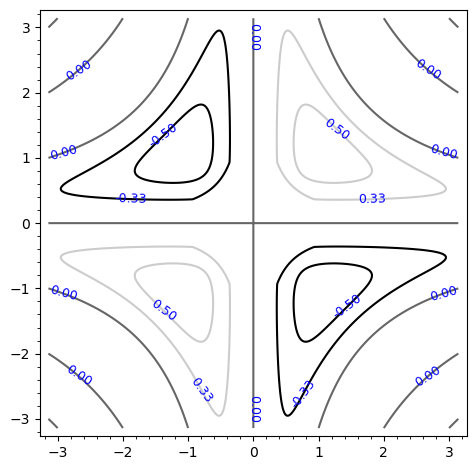

In [ ]:
contour_plot(af(x, y), (x, -pi, pi), (y, -pi, pi), contours = [-1/2, -1/3, 0, 1/3, 1/2], fill = False, plot_points = 300, labels = True)

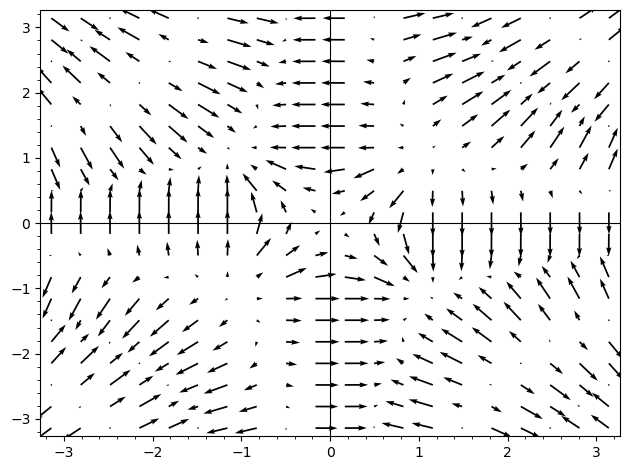

In [ ]:
plot_vector_field(-analytic_grad(x, y), (x, -pi, pi), (y, -pi, pi))

### Unit 5

**Problem 7**

Using Sagemath solve the following two problems:
(A) Suppose that the test scores for first-year integral calculus final exams are normally distributed with
mean 70 and standard deviation 14. What percentage of final exam scores lie between 75 and 90?
(B) The time taken for a student to finish a task is normally distributed with a mean µ and a standard
deviation σ. It is found that 6% of the students take less that 7 minutes to complete the task and 75%
take less than 22 minutes. (i) Find µ and σ (numerical values). (ii) Verify the results of (i).

We standardise the given values for the score range

In [ ]:
z1 = (75-70)/14.; z1

0.357142857142857

In [ ]:
z2 = (90-70)/14.; z2

1.42857142857143

The probability will be:

In [ ]:
G = RealDistribution('gaussian', 1)
p = G.cum_distribution_function(z2) - G.cum_distribution_function(z1);
n(100 * p, digits = 4)

28.39

B, (i)

In [ ]:
G = RealDistribution('gaussian', 1)
μ, σ = var('μ, σ')
eq1 = (7.-μ)/σ == G.cum_distribution_function_inv(0.06); eq1

-(μ - 7.00000000000000)/σ == -1.554773594596853

In [ ]:
eq2 = (22.-μ)/σ == G.cum_distribution_function_inv(0.75); eq2

-(μ - 22.0000000000000)/σ == 0.6744897501960817

In [ ]:
sols = solve([eq1, eq2], [μ, σ]); sols

[[μ == (4751219148654643/272095693724664), σ == (1830844891162495/272095693724664)]]

In [ ]:
n(sols[0][0].rhs(), digits = 10), n(sols[0][1].rhs(), digits = 10)

(17.46157421, 6.728680142)

(ii)

In [ ]:
import scipy.stats as st

st.norm.ppf(0.06, 17.46157421, 6.728680142)

6.999999998730193

In [ ]:
st.norm.ppf(0.75, 17.46157421, 6.728680142)

21.999999998126913

**Problem 8**

The birthday paradox, also known as the birthday problem, states that in a random group of 23 people,
there is about a 50 percent chance that two people have the same birthday.
(a) Use sagemath to check if this is really true. To this end (i) define a function sagebdate(k) that
assigns random birthdays to k people and returns 0 if all birthbays are different and 1 otherwise. (ii)
Run a sagebdate(k) simulation using a random sample of n = 10000 cases to calculate the above stated
probability.
(b) Define a function p(k,n) that calculates the probability of at least two people having the same birthday
for arbitrary k using a random sample of n cases. Use p(k,n) to plot the associated probability function
for 2 ≤ k ≤ 100 and n = 10000 as above.

(a)

In [ ]:
def samebdates(k):
    w = [randint(1, 365) for i in range(k)]
    if (len(w) == len(set(w))):
        return 0
    else:
        return 1
    

def p(k, n):
    return float([samebdates(k) for i in range(n)].count(1)) / float(n)

nn = 10000
p(23, nn)

0.5106

Thus, the statement is true.

(b)

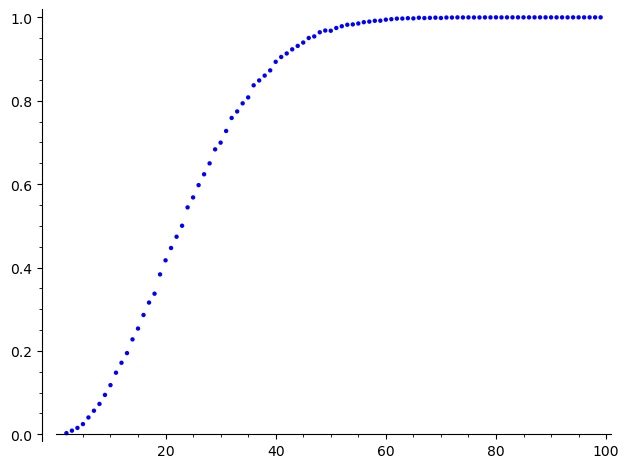

In [ ]:
data = [[k, p(k, nn)] for k in range(2, 100)]
points(data)

### Unit 6

**Problem 7**

Solve the following problem using sagemath :
A artisan makes tables and chairs. Each table can be sold for a profit of 30 euros and each chair for a
profit of 10 euros. The artisan can afford to work up to 40 hours a week and it takes six hours to make
a table and three hours to make a chair. Customer demand requires him to make at least three times as
many chairs as tables. Moreover, tables take up four times as much storage space as chairs and there is
room for a maximum of four tables each week. How many tables and chairs should the artisan produce
per week (non integer values are allowed) in order to maximise his profit?
(a) Formulate this problem as a linear programming problem and write the resulting equations (in a
sagemath markdown cell).
(b) Solve the problem graphically.
(c) Solve the problem using the appropriate class of sagemath functions.

**Solution**

(a)

t = Number of tables produced per week\
c = Number of chairs produced per week\
$max 30t+10c$ subject to:\
$6t+3c \le 40$ (working hours)\
$c \ge 3t$ (customer demand)\
$t+c/4 \le 4$ (storage space)

(b)

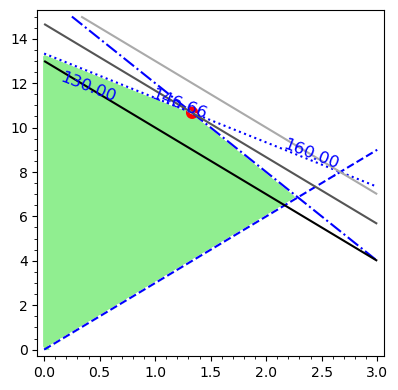

In [ ]:
t, c = var('t, c')
c1 = implicit_plot(6*t+3*c==40, (t, 0, 3), (c, 0, 15), linestyle = ':')
c2 = implicit_plot(c-3*t==0, (t, 0, 3), (c, 0, 15), linestyle = '--')
c3 = implicit_plot(t+c/4==4, (t, 0, 3), (c, 0, 15), linestyle = '-.')
rp = region_plot([6*t+3*c <= 40, c-3*t >= 0, t+c/4 <= 4, t>= 0, c>=0], (t, 0, 3), (c, 0, 15), incol = 'lightgreen')
cp = contour_plot(30*t+10*c, (t, 0, 3), (c, 0, 15), labels = True, fill = False, contours = [130, 146.66, 160], label_fontsize = 12)

poi = point((4/3, 32/3), pointsize = 80, color = 'red', zorder = 1)
show(rp+c1+c2+c3+cp+poi, aspect_ratio = 1/5)

(c)

In [ ]:
p = MixedIntegerLinearProgram(maximization = True)
v = p.new_variable(real = True, nonnegative = True)
t, c = v['t'], v['c']

# Set the cost function
p.set_objective(30*t+10*c)

# and the constraints
p.add_constraint(6*t+3*c<=40)
p.add_constraint(c-3*t>=0)
p.add_constraint(t+c/4<=4)

# solution
p.solve()

146.66666666666666

In [ ]:
p.get_values(t), p.get_values(c)

NameError: name 'p' is not defined

**Problem 8**

(Solution)

In [ ]:
%display latex
f(x, y) = sin(x)*e^((1-cos(y))^2)+cos(y)*e^((1-sin(x))^2)+(x-y)^2; f(x, y)

(x - y)^2 + cos(y)*e^((sin(x) - 1)^2) + e^((cos(y) - 1)^2)*sin(x)

(a)

In [ ]:
minimize(f(x, y), (-1, 2), verbose = True, algorithm = 'simplex')

Optimization terminated successfully.
         Current function value: -87.310883
         Iterations: 37
         Function evaluations: 72


(-1.5366333439879725, 3.107468482114186)

In [ ]:
minimize(f(x, y), (-1, 2), algorithm = 'ncg', verbose = True)

Optimization terminated successfully.
         Current function value: -87.310883
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
         Hessian evaluations: 5


(-1.5366624719662723, 3.10745879896264)

The ncg (newton-conjugate gradient) method that uses both gradient and the Hessian, is very fast as it leads to a local minimum\
using 9 function evaluations compared to 72 evaluations required by the simplex method which is not using the derivatives.

(b)

In [ ]:
minimize(f(x, y), (3, 4), algorithm = 'simplex', verbose = True)

Optimization terminated successfully.
         Current function value: -106.764537
         Iterations: 39
         Function evaluations: 74


(4.701035520824213, 3.152910394865159)

In [ ]:
u = minimize(f(x, y), (3, 4), algorithm = 'ncg', verbose = True)

Optimization terminated successfully.
         Current function value: -106.764537
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
         Hessian evaluations: 6


The results are similar to those of question (a).

(c)

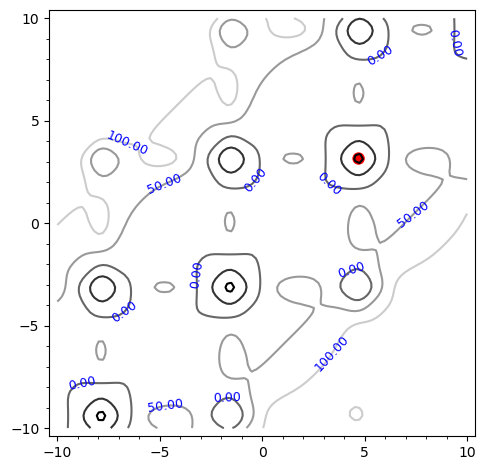

In [ ]:
contour_plot(f(x, y), (x, -10, 10), (y, -10, 10), fill = False, labels = True, contours = [-100, -50, 0, 50, 100], plot_points = 100) + \
point(u, pointsize = 80, color = "red", zorder = 1)

(d)

In [ ]:
g(x, y) = 25 - (x+5)^2 - (y+5)^2
u = minimize_constrained(f(x, y), g(x, y), (-5, -3)); u

(-1.5821526791358436, -3.1301674416382737)

In [ ]:
f(u[0], u[1])

-106.76453586724995

(e)

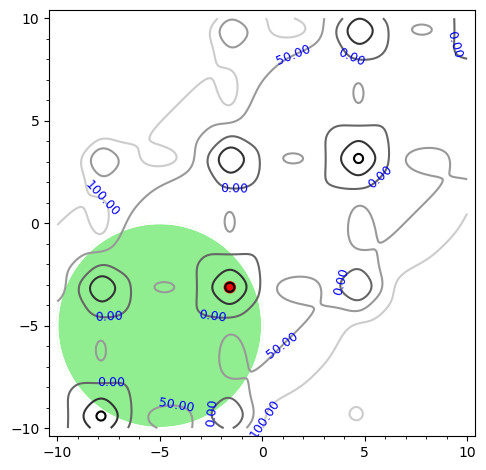

In [ ]:
region_plot(g(x, y) > 0, (x, -10, 10), (y, -10, 10), incol = 'lightgreen') +\
contour_plot(f(x, y), (x, -10, 10), (y, -10, 10), fill = False, labels = True, contours = [-100, -50, 0, 50, 100], plot_points = 200) +\
point(u, pointsize = 80, color = "red", zorder = 1)

**Problem 9**

(Solution)

(a)

In [44]:
f(x, y) = (x+y+3*x*y)/(1+x^2+y^2); f(x, y)

(3*x*y + x + y)/(x^2 + y^2 + 1)

In [45]:
fx = diff(f(x, y), x).full_simplify().numerator(); fx

-3*x^2*y + 3*y^3 - x^2 - 2*x*y + y^2 + 3*y + 1

In [46]:
fy = diff(f(x, y), y).full_simplify().numerator(); fy

3*x^3 - 3*x*y^2 + x^2 - 2*x*y - y^2 + 3*x + 1

In [48]:
sols = solve([fx == 0, fy == 0], [x, y], explicit_solutions = True, algorithm = 'sympy')
realsols = [u for u in sols if imag(n(x.subs(u))) == 0]; realsols

[{x: -1/4*sqrt(17) + 3/4, y: -1/4*sqrt(17) + 3/4},
 {x: 1/4*sqrt(17) + 3/4, y: 1/4*sqrt(17) + 3/4}]

(b)

In [50]:
f(x.subs(realsols[0]), y.subs(realsols[0])).full_simplify()

1/2*(13*sqrt(17) - 51)/(3*sqrt(17) - 17)

In [53]:
h1 = f(x, y).hessian().subs(realsols[0]).eigenvalues()
n(h1[0]), n(h1[1])

(3.07648156287194, -2.10633906272657)

So, we have a saddle point

In [54]:
f(x.subs(realsols[1]), y.subs(realsols[1])).full_simplify()

1/2*(13*sqrt(17) + 51)/(3*sqrt(17) + 17)

In [55]:
h2 = f(x, y).hessian().subs(realsols[1]).eigenvalues()
n(h2[0]), n(h2[1])

(-0.893660937409168, -0.0764815627361643)

So, we have a maximum.

(c)

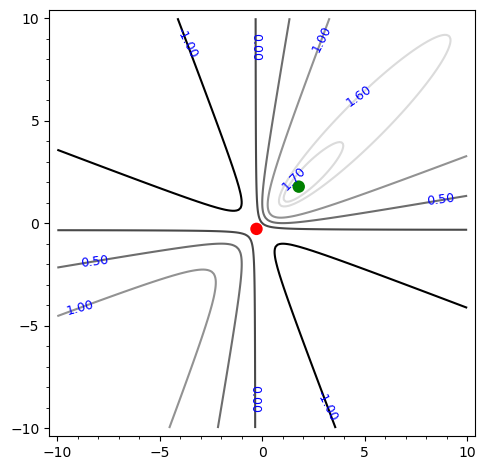

In [57]:
contour_plot(f(x, y), (x, -10, 10), (y, -10, 10), fill = False, plot_points = 200, contours = [-1, 0, 0.5, 1, 1.6, 1.7, 2], labels = True) +\
point((x.subs(realsols[0]), y.subs(realsols[0])), pointsize = 80, color = "red", zorder = 1) +\
point((x.subs(realsols[1]), y.subs(realsols[1])), pointsize = 80, color = "green", zorder = 1)